# Chapter 9: Challenge Activity 9.01 - 9.02

## Activity 9.01: Performing Multiclass Classification and Evaluating Performrance

Build a machine learning model that will be able to predict the most effective channel that can be used to target a customer based on the annual spend. 

1) Import required libraries.

2) Load marketing data into the DataFrame

3) Check the shapre and the missing values and show a summary report of the data. 

4) Check the target variable, **Channel**, for the number of transactions for each of the channels.

5) Split the data into training and teseting sets using the ratio (80:20)train:test.

6) Fit the random forest classifier and store the model.

7) Predict the test data

8) Find the micro- and macro-average reports using the precision_recall_fscore_support function.

9) Print the classification report.

10) plot the confusion matrix. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('Activity9.01/MarketingData.csv')
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [4]:
data.shape

(20000, 7)

In [5]:
data.isnull().values.any()

False

In [6]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5853.350191,5267.873868,4873.362341,4899.477763,4786.331781,5613.672184,1.499350
std,1128.370297,1177.563192,1265.579790,1220.923393,1154.682284,1343.743103,1.118464
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5155.249455,4438.167387,3983.317183,4071.997222,3877.943500,4705.582182,0.000000
50%,5988.720207,5337.741327,4828.100401,5048.099489,4857.070488,5425.888761,1.000000
75%,6573.895741,6081.755179,5784.992859,5684.876863,5602.146034,6574.281056,3.000000
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000


In [7]:
data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

In [9]:
target = 'Channel'
X = data.drop(['Channel'], axis =1)
y = data[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y,
                                                   test_size=.2,
                                                   random_state=123,
                                                   stratify=y)

In [13]:
clf_random = RandomForestClassifier(n_estimators=20,
                                   max_depth=None,
                                   min_samples_split=7,
                                   random_state=0)
clf_random.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [14]:
y_pred = clf_random.predict(X_test)

In [15]:
precision_recall_fscore_support(y_test,y_pred,average='macro')

(0.8888143115382328, 0.8885103588795973, 0.888619538273321, None)

In [16]:
precision_recall_fscore_support(y_test,y_pred,average='micro')

(0.8885, 0.8885, 0.8885, None)

In [17]:
target_names = ['Retail', 'RoadShow', 'SocialMedia','Television']
print(classification_report(y_test,y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Retail       0.90      0.90      0.90      1001
    RoadShow       0.86      0.86      0.86      1000
 SocialMedia       0.93      0.91      0.92       998
  Television       0.87      0.89      0.88      1001

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



In [18]:
cm = confusion_matrix(y_test, y_pred)

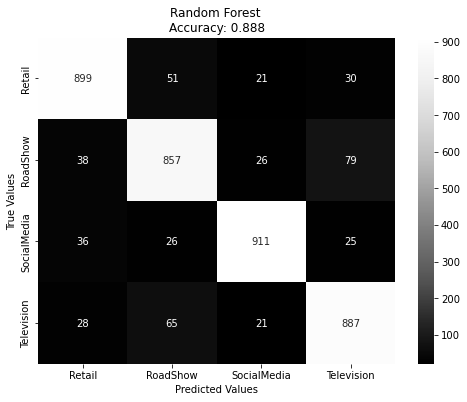

In [21]:
cm_df = pd.DataFrame(cm, 
                    index = target_names,
                    columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Greys_r')
plt.title('Random Forest \nAccuracy: {0:.3f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

The performance metrics in the Classification Report and precision_recall_fscore_support functions were the same. The confusion matrix showed that the model was able to accurately predict the classes for most of the test points.

### End Activity 9.01

## Activity 9.02: Dealing with Imbalanced Data Using Scikit-Learn

1) Import all necessary libraries.

2) Read the dataset into a pandas DataFrame

3) Rename the y column Target

4) Replace the no values with 0 and yes with 1. 

5) Check the shape and missing values in the data.

6) Use the describe function to check the continuos and categoricaal values

7) Check the count of the class labels present in the target variables.

8) Use cat.codes function to encode the job, martial, default, housing, loan, contact, and poutcome columns. 
- Replace primary education with 0, Secondary with 1, and tertiary with 2
- Replace the months January to December with 1 to 12. 

9) Check the the 5 first rows of the bank data after the conversion. 

10) Split the data into training and tsting sets. 

11) Check the number of items in each class in y_train and y_test using value_counts method.

12) Use Standard_Scalar

13) Call the Random Forest Classifier

14) Fit the Random Forest Model

15) Predict on the test data using the Random Forest Model

16) Use the predictions and the ground-truth classes for teset data to get the classification report

17) Get the confusion matrix for the trained random forest model. 

18) Use the smote() function on x_train and y_train to convert the imbalanced dataset into a balanced dataset.
- Assign new values to x_resampled and y_resampled. 

19) Use standard_scalar to fit on x_resampled and x_test.
- assign to X_train_sc_resampled and X_test_sc

20) fit the Random Forest Classifier on X_train_sc_resampled and y_resampled. 

21) Predict on X_test_sc and use the  predictions and ground-truth classes to generate the classification report.

22) Plot the confusion matrix for the new trained random forest model. 


In [36]:


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [37]:


bank = pd.read_csv('Activity9.02/bank.csv', sep =';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [38]:


bank = bank.rename(columns={'y':'Target'})

In [39]:


bank['Target'] = bank['Target'].replace({'no':0, 'yes':1})

In [40]:


bank.shape

(4334, 17)

In [41]:


bank.isnull().values.any()

False

In [42]:


bank.describe()

,age,balance,day,duration,campaign,pdays,previous,Target
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,40.991924,1410.637517,15.913936,264.544301,2.806876,39.670974,0.544070,0.115828
std,10.505378,3010.612091,8.216673,260.642141,3.129682,99.934062,1.702219,0.320056
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,67.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,440.000000,16.000000,186.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1464.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [43]:


bank.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,4334,4334,4334,4334,4334,4334,4334,4334,4334
unique,12,3,3,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,942,2680,2306,4261,2476,3650,2801,1339,3555


In [35]:
bank['Target'].value_counts(0)

0    3832
1     502
Name: Target, dtype: int64

In [45]:
bank['job'] = bank['job'].astype('category').cat.codes
bank['marital'] = bank['marital'].astype('category').cat.codes
bank['default'] = bank['default'].astype('category').cat.codes
bank['housing'] = bank['housing'].astype('category').cat.codes
bank['loan'] = bank['loan'].astype('category').cat.codes
bank['contact'] = bank['contact'].astype('category').cat.codes
bank['poutcome'] = bank['poutcome'].astype('category').cat.codes

In [48]:
bank['education'].replace({'primary': 0, 'secondary': 1, 'tertiary':2}, inplace= True)

bank['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                      'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                     [1,2,3,4,5,6,7,8,9,10,11,12],
                     inplace= True)

In [49]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,5,226,1,-1,0,3,0


In [50]:
target = 'Target'
X = bank.drop(['Target'], axis=1)
y=bank[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=.15,
                                                   random_state=123,
                                                   stratify=y)

In [51]:
y_train.value_counts()

0    3256
1     427
Name: Target, dtype: int64

In [52]:
y_test.value_counts()

0    576
1     75
Name: Target, dtype: int64

In [53]:
standard_scalar = StandardScaler()

X_train_sc = standard_scalar.fit_transform(X_train)
X_test_sc = standard_scalar.transform(X_test)

In [54]:
clf_random = RandomForestClassifier(n_estimators=20,
                                   max_depth=None,
                                   min_samples_split=7,
                                   random_state=0)

In [55]:
clf_random.fit(X_train_sc,y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [56]:
y_pred = clf_random.predict(X_test_sc)

In [57]:
target_names = ['No', 'Yes']
print(classification_report(y_test,y_pred,
                           target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.97      0.95       576
         Yes       0.64      0.40      0.49        75

    accuracy                           0.90       651
   macro avg       0.78      0.69      0.72       651
weighted avg       0.89      0.90      0.89       651



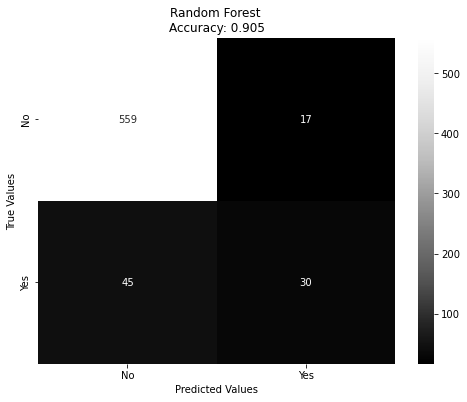

In [59]:
cm = confusion_matrix(y_test,y_pred)

cm_df = pd.DataFrame(cm,
                    index=['No','Yes'],
                    columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot= True, fmt = 'g', cmap = 'Greys_r')
plt.title('Random Forest \nAccuracy: {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [63]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [64]:
standard_scalar = StandardScaler()

X_train_sc_resampled = standard_scalar.fit_transform(X_resampled)
X_test_sc = standard_scalar.transform(X_test)

In [65]:
clf_random.fit(X_train_sc_resampled, y_resampled)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [66]:
y_pred=clf_random.predict(X_test_sc)

In [67]:
target_names = ['No', 'Yes']
print(classification_report(y_test,y_pred,
                           target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.91      0.93       576
         Yes       0.46      0.57      0.51        75

    accuracy                           0.87       651
   macro avg       0.70      0.74      0.72       651
weighted avg       0.89      0.87      0.88       651



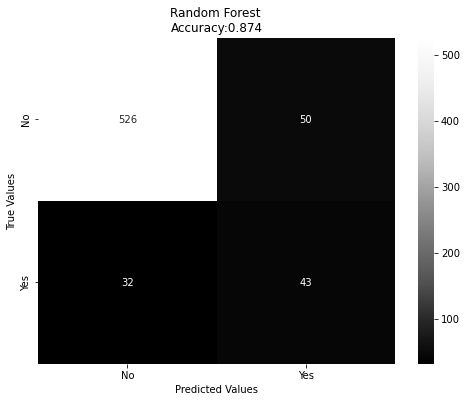

In [68]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, 
                    index = ['No', 'Yes'],
                    columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot= True, fmt ='g', cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

The imbalanced Data had predicted 30 'Yes' correct while the Balanced Data predicted 43 'Yes' Correct. Using SMOTE technique, the class imbalance was reduced and the model was trained again. The final model showed a significant increase for the minor class. 

### End Activity 9.02